In [2]:
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("..")

In [3]:
# read from json
data = None
experiment_name = "fig3a"
with open("../../../output/prioplus-eurosys25/experiments/" + experiment_name + ".json", "r") as f:
    data = json.load(f)

In [4]:
# In this experiment, we have four flows and a bottleneck link
# Draw the send rate of each flow in subfigure1
# And draw the queue length of the bottleneck link in subfigure2

# Calculate the send rate from data{flowStatistics:[0:4]:sentPkt:[timeNs,sizeByte]}
# The send rate is calculated by the number Bytes sent in each time interval
send_rate_interval_ns = 2e4  # 10us
send_rate = []
flow_num = 2
for i in range(flow_num):
    send_rate.append([])
    wnd_start = data["flowStatistics"][i]["sentPkt"][0]["timeNs"]
    # the first point
    send_rate[i].append({"timeNs": wnd_start, "sendRateGbps": 0})
    wnd_data = 0
    for sentPkt in data["flowStatistics"][i]["sentPkt"]:
        if sentPkt["timeNs"] - wnd_start > send_rate_interval_ns:
            # Gbps = bpns
            send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                                "sendRateGbps": wnd_data * 8 / send_rate_interval_ns})
            wnd_start = sentPkt["timeNs"]
            wnd_data = 0
        wnd_data += sentPkt["sizeByte"]
    # the last point
    send_rate[i].append({"timeNs": wnd_start + send_rate_interval_ns/2,
                         "sendRateGbps": 0})


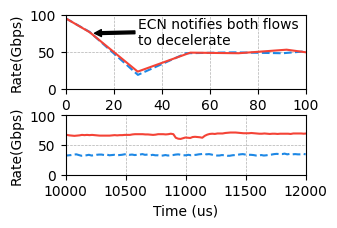

In [5]:
# draw the send rate in a new figure
# fig = plt.figure(figsize=(3, 2))
fig, axs = plt.subplots(2, 1, figsize=(3, 2), gridspec_kw={'height_ratios': [1, 0.8]})
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1 = axs[0]
# ax1.set_xlabel("Time (us)")
ax1.set_ylabel("Rate(Gbps)")

time_shift = 100e3

color_rate = ["#F44336", "#1E88E5"]
color_queue = ["#4E342E", "#FB8C00"]
line = ["-", "--"]

ax1.plot([s["timeNs"]/1e3 - time_shift for s in send_rate[0]],
         [95.2]+[s["sendRateGbps"] for s in send_rate[0]][1:], label="Low-prio flow", color=color_rate[1], linestyle=line[1])
ax1.plot([s["timeNs"]/1e3 - time_shift for s in send_rate[1]],
         [95.2]+[s["sendRateGbps"] for s in send_rate[1]][1:], label="High-prio flow", color=color_rate[0], linestyle=line[0])
ax1.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')

ax1.annotate('ECN notifies both flows \nto decelerate', xy=(12, 75), xytext=(30, 60),
             xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0,
                             width=2, headlength=5, headwidth=5),
             )

# ax.set_xlim(100e3, 100.1)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)

# hide x-axis label and ticks
# ax1.xaxis.set_tick_params(labelbottom=False)
# ax1.set_xticks([])

# ax2 = fig.add_subplot(212)
ax2 = axs[1]
ax2.set_xlabel("Time (us)")
ax2.set_ylabel("Rate(Gbps)")
# time_shift = 100e3 + 10
ax2.plot([s["timeNs"]/1e3 - time_shift for s in send_rate[0]],
         [95.2]+[s["sendRateGbps"] for s in send_rate[0]][1:], label="Low-prio flow", color=color_rate[0], linestyle=line[0])
ax2.plot([s["timeNs"]/1e3 - time_shift for s in send_rate[1]],
         [95.2]+[s["sendRateGbps"] for s in send_rate[1]][1:], label="High-prio flow", color=color_rate[1], linestyle=line[1])
ax2.grid(True, linestyle='--', linewidth=0.5, which='both', axis='both')
ax2.set_ylim(0, 100)
ax2.set_xlim(10000, 12000)

plt.savefig("../figures/" + "fig3a" +
            ".pdf", bbox_inches='tight', dpi=600, format='pdf')